# Victor Ramirez #
CMSE 491 <br/>
Fall 2017 <br/>
Homework 1 <br/>

Disclaimer: I worked with Kyle Zimmer in problems 1, 4 and 5. 


1. Let $G$ be a simple (no loops), undirected graph with adjacency matrix $A$. <br/>
a) Prove that the degree of vertex $v_{i}$ is the ith diagonal entry in $A^{2}$ <br/>
b) What is in entry $(i, j)$ of $A^{2}$ in terms of the graph? Generalize this statement to entry
$(i, j)$ of $A^{n}$ and prove the statement.

Solution:
   



The $k \times k$ adjacency matrix $A$ is defined as:


$$
\mathbf{A} = \left[\begin{array}
{rrr}
A_{11} & A_{12} & \dots & A_{1k} \\
A_{21} & A_{22} & \dots & A_{2k} \\
\vdots & \vdots & \ddots & \vdots \\
A_{k1} & A_{k2} & \dots & A_{kk}
\end{array}\right]
$$



The elements $A_{ij}$ of the Adjacency Matrix $A$ are defined as:

$$
v_iv_j = A_{ij} = \left\{\begin{array}{lr}
	1, & \text{when $v_{i}$ and $v_{j}$ are adjacent}\\
	0, & \text{otherwise}\\
	\end{array}\right\} [1]
$$


where each element in the row vector $\vec{v_i}$ containing the vertex $v_i$ $\times$ the row vector of the vertices in the graph, $\vec{v}$. 

$$\mathbf{\vec{{v_i}}} = v_i
\left[\begin{array}
{rrr}
v_1 & v_2 & \dots & v_k
\end{array}\right]
= v_i
 \left[\begin{array}
{rrr}
A_{11} & A_{12} & \dots & A_{1k}
\end{array}\right]
$$

Likewise, $\vec{v_i}^{T}$ = $v_i$ $\times$ the column vector of the vertices in the graph, $\vec{v}^{T}$. 

The vector $\vec{v_i}$ contains elements which signal whether $v_i$ is adjacent to $v_j$ or not as defined by [1]. The degree is defined as the sum of the adjacent vertices for any given vertex. Thus, for vertex $v_i$ the degree $deg(v_i)$ is the sum of the elements in $\vec{v_i}$. This is expressed as:

$$
\sum_{j=1}^{k} v_{i}v_{j} = deg(v_{i})
$$

The sum on the lefthand side for j is just the vector $\vec{v}$. This can thus be rewritten as:
$$
deg(v_{i}) = \vec{v_i}\vec{{v}^{T}}
$$
Calculating the ith diagonal of the Adjacency matrix squared gives:

$$
A^{2}_{ii} = A_{i1}A_{1i} + A_{i2}A_{2i} + \dots + A_{ik}A_{ki} \\
= \vec{v_i}\vec{{v}^{T}} \\
= deg(v_{i})
$$





b) Definition [1] contains $A_{ij}^1$. $A_{ij}^2$ is thus:
$$
A_{ij} \times A_{ij}
$$

For $v_i$ adjacent to $v_j$, this will equal to 1 by [1]. For $v_i$ not adjacent to $v_j$, this will equal 0. Raising it to the kth power will yield the same thing. Thus we can generalize [1] as:

$$
A_{ij}^{k} = \left\{\begin{array}{lr}
	1, & \text{when $v_{i}$ and $v_{j}$ are adjacent}\\
	0, & \text{otherwise}\\
	\end{array}\right\}
$$

$5$. Write code for the function $RipsGraph(P,d)$ as follows. <br/>
Inputs:
- a set of points $P$ $\subset$ $\mathbb{R}^{2}$ given as a $k \times 2$ numpy matrix 
- a diameter $d \ge 0$ 
<br/>

Output:
- networkx graph which is the 1-skeleton of the Rips complex $V R(P, d)$.
        
        
Create a point set of 15 random points in the box $[0, 1]\times[0; 1]$. Draw this graph as an overlay
on the points (even though there will likely be crossings).

Much of the foundation of this code is from a blog post by stephenhky found here: <br/>

https://datawarrior.wordpress.com/2015/09/14/tda-2-constructing-connectivities/

I made some changes in order to fit the specifications of this assignment

In [2]:
import numpy as np
from itertools import combinations
from scipy.sparse import dok_matrix
from operator import add

In [19]:
# def faces(simplices):
#     faceset = set()
#     for simplex in simplices:
#         numnodes = len(simplex)
#         for r in range(numnodes, 0, -1):
#             for face in combinations(simplex, r):
#                 faceset.add(face)
#     #print(faceset)
#     return faceset

class SimplicialComplex:
    '''Simplicial Complex class that takes a list of simplicies'''
    def __init__(self, simplices=[]):
        self.import_simplices(simplices=simplices)
        #self.faceset = faces(simplices)

    def import_simplices(self, simplices=[]):
        self.simplices = map(lambda simplex: tuple(sorted(simplex)), simplices)
        self.face_set = self.faces()
        
    def faces(self):
        faceset = set()
        for simplex in self.simplices:
            numnodes = len(simplex)
            for r in range(numnodes, 0, -1):
                for face in combinations(simplex, r):
                    faceset.add(face)
        #print(faceset)
        return faceset

    def n_faces(self, n):
        return filter(lambda face: len(face)==n+1, self.face_set)

In [20]:
import networkx as nx
from scipy.spatial import distance
from itertools import product


class RipsGraph(SimplicialComplex):
    '''Main Rips complex class. Takes in points [k x 2 numpy matrix] epsilon (aka diameter) [float]'''
    def __init__(self, points, epsilon, labels=None, distfcn=distance.euclidean):
        self.pts = points
        self.labels = range(len(self.pts)) if labels==None or len(labels)!=len(self.pts) else labels
        self.epsilon = epsilon
        self.distfcn = distfcn
        self.network = self.construct_network(self.pts, self.labels, self.epsilon, self.distfcn)
        self.import_simplices(map(tuple, list(nx.find_cliques(self.network))))
 
    def construct_network(self, points, labels, epsilon, distfcn):
        g = nx.Graph()
        g.add_nodes_from(labels)
        zips = zip(points, labels)
        for pair in product(zips, zips):
            if pair[0][1]!=pair[1][1]:
                dist = distfcn(pair[0][0], pair[1][0])
            if dist<epsilon:
                g.add_edge(pair[0][1], pair[1][1])
        return g

In [23]:
k = 15
d = 0.25
P = np.random.random((k,2))
VR = RipsGraph(P,d)

In [22]:
sc = SimplicialComplex(simplices=[(1,2,3,4)])
sc.face_set

{(1,),
 (1, 2),
 (1, 2, 3),
 (1, 2, 3, 4),
 (1, 2, 4),
 (1, 3),
 (1, 3, 4),
 (1, 4),
 (2,),
 (2, 3),
 (2, 3, 4),
 (2, 4),
 (3,),
 (3, 4),
 (4,)}

In [24]:
nx.draw(VR)

TypeError: object of type 'RipsGraph' has no len()

TypeError: object of type 'RipsGraph' has no len()

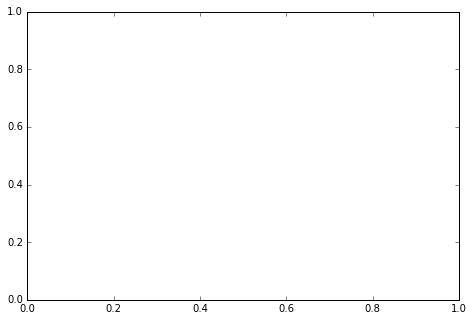

In [88]:
%matplotlib inline
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt



In [95]:
def mag(x,y):
    return (x**2+y**2)**0.5
def RipsGraph(P,d):
    dim = len(P)
    g1 = nx.Graph()
    for i in range(dim):
        xi,yi= P[i]        
        g1.add_node(i,pos=(xi,yi))
        for j in range(dim):
            xj,yj = P[j]
            if mag(xi-xj,yi-yj) <= d:
                g1.add_edge(i,j)
            
        
    
#     for row1 in range(dim):
#         xi_1, yj_1 pos=nx.get_node_attributes(G,'pos')= P[i1]
#         for row2 in range(dim):
#             xi_2, y
    return g1 #nx graph 1 skeleton Rips complex

In [96]:
k = 15
d = 0.25
P = np.random.random((k,2))
VR = RipsGraph(P,d)

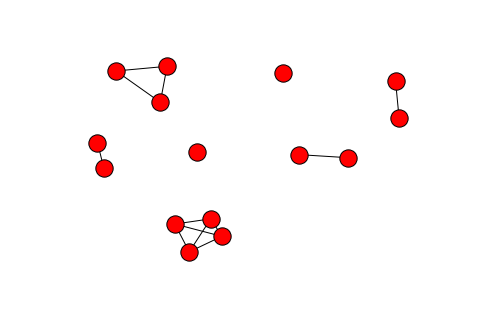

In [97]:
pos=nx.get_node_attributes(VR,'pos')
#print(VR.nodes())
nx.draw(VR,pos)

In [98]:
d2 = nx.wheel_graph(15)

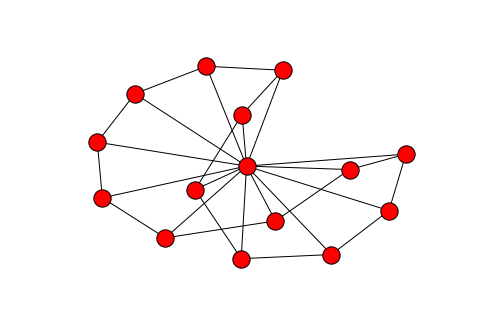

In [100]:
nx.draw(wg)

In [103]:
import numpy as np
from itertools import combinations
from scipy.sparse import dok_matrix
from operator import add


In [104]:
class SimplicialComplex:
    def __init__(self, simplices=[]):
        self.import_simplices(simplices=simplices)

    def import_simplices(self, simplices=[]):
        self.simplices = map(lambda simplex: tuple(sorted(simplex)), simplices)
        self.face_set = self.faces()

In [105]:
import networkx as nx
from scipy.spatial import distance
from itertools import product

 
class VietorisRipsComplex(SimplicialComplex):
    def __init__(self, points, epsilon, labels=None, distfcn=distance.euclidean):
        self.pts = points
        self.labels = range(len(self.pts)) if labels==None or len(labels)!=len(self.pts) else labels
        self.epsilon = epsilon
        self.distfcn = distfcn
        self.network = self.construct_network(self.pts, self.labels, self.epsilon, self.distfcn)
        self.import_simplices(map(tuple, list(nx.find_cliques(self.network))))
 
    def construct_network(self, points, labels, epsilon, distfcn):
        g = nx.Graph()
        g.add_nodes_from(labels)
        zips = zip(points, labels)
        for pair in product(zips, zips):
            if pair[0][1]!=pair[1][1]:
                dist = distfcn(pair[0][0], pair[1][0])
            if dist<epsilon:
                g.add_edge(pair[0][1], pair[1][1])
        return g